<a href="https://colab.research.google.com/github/premswaroopmusti/Text-Classification-Using-BERT-and-Tensorflow/blob/main/Text_Classification_Using_BERT_%26_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine_learning_projects/datasets/BERT/SMSCollection.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

So we have 4825 ham messages in the dataset and 747 spam messages

We can see that there is an imbalance in our dataset.

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
747/4825

# so 15% are spam messages and 85% are ham messages
# so definitely an imbalance in the dataset

0.15481865284974095

We will use a technique called Down-Sampling to balance the dataset

So we will pick any random 747 samples from 4825 ham messages & we will discard remaining ham messages

In this way we will be having equal number of spam and ham messages

In [ ]:
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 2)

In [ ]:
df_ham = df[df['Category'] == 'ham' ]
df_ham.shape

(4825, 2)

In [ ]:
df_ham.sample(2)

,Category,Message
3314,ham,"Huh... Hyde park not in mel ah, opps, got conf..."
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..


In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

Now both spam and ham have 747 samples

In [ ]:
# now lets concatenate spam and ham together
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [ ]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
df_balanced.sample(5)

,Category,Message
3529,spam,You are a £1000 winner or Guaranteed Caller Pr...
225,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
2119,spam,U can WIN £100 of Music Gift Vouchers every we...
2264,spam,Not heard from U4 a while. Call 4 rude chat pr...
5482,spam,URGENT We are trying to contact you Last weeke...


In [ ]:
# now lets create a new column called spam, bcz column category is a text column, i want to create a binary column called spam
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
751,spam,"Do you realize that in about 40 years, we'll h...",1
823,spam,"SMSSERVICES. for yourinclusive text credits, p...",1
5214,spam,Natalja (25/F) is inviting you to be her frien...,1
2674,ham,"Good afternoon, my boytoy ... How are you feel...",0
2307,ham,"Aight that'll work, thanks",0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify = df_balanced['spam'])
# we used stratify so that in our train and test sample ,the distribution of the categories is equal 

In [ ]:
x_train.head(4)

4248    Text PASS to 69669 to collect your polyphonic ...
706     I don't think I can get away for a trek that l...
1425                    Yes.. now only saw your message..
3885    A link to your picture has been sent. You can ...
Name: Message, dtype: object

In [50]:
x_test.shape

(374,)

In [ ]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

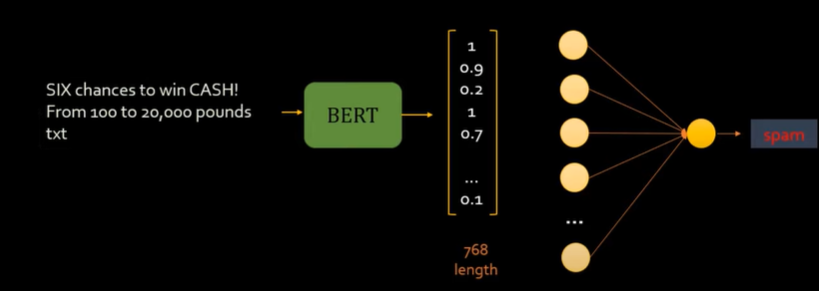

our goal is to supply sentence to our BERT model
and create a 768 length vector 

In [ ]:
def get_sentence_embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embedding(['Hello boys and girls',
                        'Please be seated'])


<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7933237 , -0.38800612, -0.7768387 , ..., -0.34763914,
        -0.6768197 ,  0.84766084],
       [-0.8821261 , -0.18920176,  0.33232158, ...,  0.25782838,
        -0.64787114,  0.9180804 ]], dtype=float32)>

In [ ]:
e = get_sentence_embedding([
                            'hockey',
                            'cricket',
                            'carrom',
                            'minister',
                            'president',
                            'election'
])


In [ ]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.92439395, -0.5234164 , -0.7887402 , ..., -0.5340652 ,
        -0.70449793,  0.899992  ],
       [-0.92026347, -0.40818   , -0.26689172, ..., -0.19524477,
        -0.6291098 ,  0.88740003],
       [-0.8981777 , -0.29923192,  0.07483628, ...,  0.20485601,
        -0.6567385 ,  0.89925534],
       [-0.7973487 , -0.21797892,  0.3128989 , ...,  0.3489501 ,
        -0.5311162 ,  0.727576  ],
       [-0.8899129 , -0.35971493, -0.4000685 , ..., -0.10678802,
        -0.6677373 ,  0.84856135],
       [-0.877641  , -0.33562964, -0.07290243, ...,  0.13356978,
        -0.61353046,  0.8446252 ]], dtype=float32)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[3]])


array([[0.8164282]], dtype=float32)

In [ ]:
cosine_similarity([e[4]],[e[5]])


array([[0.98088145]], dtype=float32)

I have used a Dropout layer in the Neural network

Let's see what is a Dropout Layer

There are techniques to tackle underfitting and overfitting problem and these techniques are called regularization

When u have a training data & if u try to train ur model too much, it might overfit

and when u get the actual test data for doing prediction it will not probably perform well

Dropout regularization is one of the techniques, that's used to tackle overfitting problem in deep learning.

Let's say if ur dataset is big, and if u run too many epochs , this neural network will try to overfit ur model

and it will not perform well on test dataset because now it will not generalize well

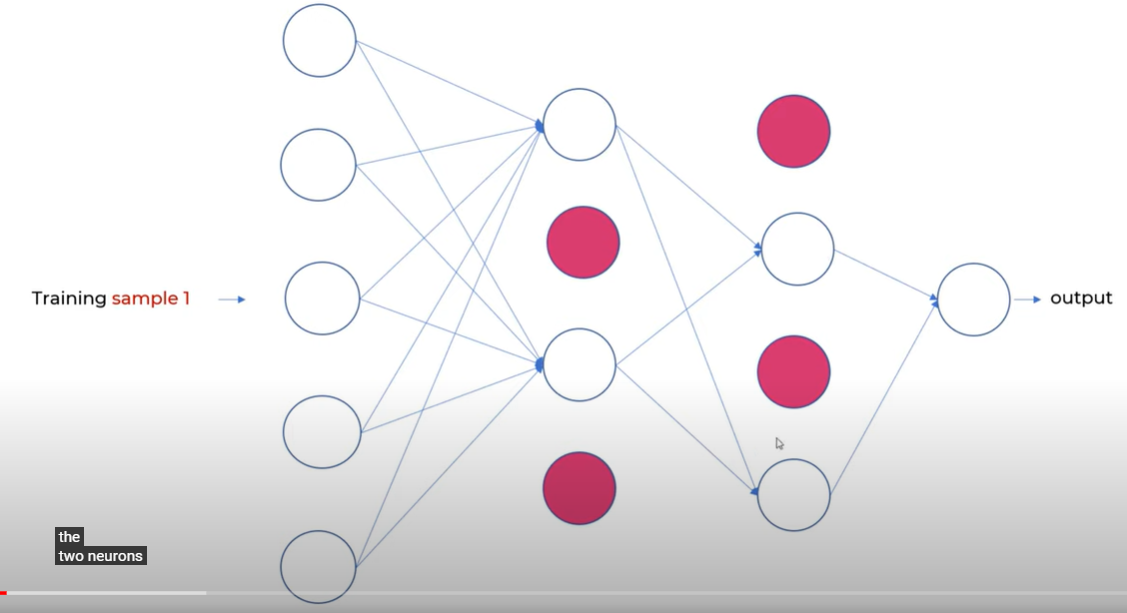

one of the things we can do is just randomly drop some neurons, 

so from the first layer we can drop these two neurons which are marked in red

from the second hidden layer we can also drop the neurons which are marked in red

and dropping neurons from the layers at random, doesnt matter which neuron u drop

we can drop at the rate of 50% from 1st layer as well as 2nd layer, we have dropped 2 neurons out of 4 from 1st layer as well as 2nd layer.

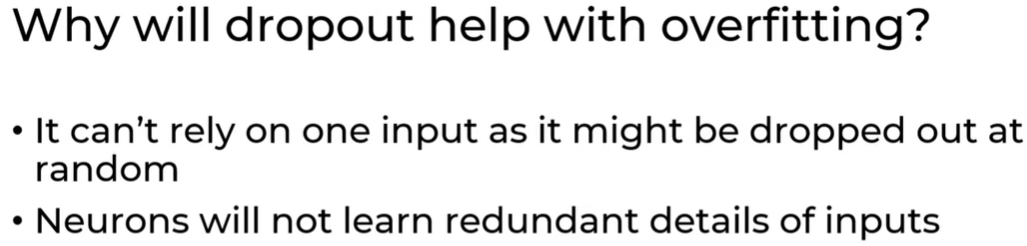

In [ ]:
# we will build the model using Functional API
# BERT Layers
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'text')

preprocessed_text = bert_preprocess(text_input)

outputs = bert_encoder(preprocessed_text)

# NEURAL NETWORK LAYERS
l = tf.keras.layers.Dropout(0.1, name = 'Dropout')(outputs['pooled_output']) # this will drop 0.1 i.e 10% of neurons it will drop
# pooled_ouput will have bert encoding of 768 size vector

l = tf.keras.layers.Dense(1,activation = 'sigmoid', name = 'output')(l)   # this layer will have only one neuron bcz one neuron is telling u whether our email is spam or not
# we use sigmoid activation bcz if output is more than 0.5 its spam and if less than 0.5 not spam

# construct final model
model = tf.keras.Model(inputs = [text_input], outputs = [l])

So there are two ways of creating a tensorflow model

- Sequential

- Functional

Functional model offers more flexibility bcz we dont need to attach layers in sequential order.

We can build complex models using Functional model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
]

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics  = METRICS)

In [ ]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 475s 13s/step - loss: 0.6643 - accuracy: 0.5964 - precision: 0.6000 - recall: 0.5786
Epoch 2/10
35/35 [==============================] - 450s 13s/step - loss: 0.5403 - accuracy: 0.7563 - precision: 0.7633 - recall: 0.7429
Epoch 3/10
35/35 [==============================] - 450s 13s/step - loss: 0.4451 - accuracy: 0.8705 - precision: 0.8535 - recall: 0.8946
Epoch 4/10
35/35 [==============================] - 444s 13s/step - loss: 0.3986 - accuracy: 0.8687 - precision: 0.8579 - recall: 0.8839
Epoch 5/10
35/35 [==============================] - 447s 13s/step - loss: 0.3674 - accuracy: 0.8750 - precision: 0.8659 - recall: 0.8875
Epoch 6/10
35/35 [==============================] - 446s 13s/step - loss: 0.3352 - accuracy: 0.8946 - precision: 0.8810 - recall: 0.9125
Epoch 7/10
35/35 [==============================] - 446s 13s/step - loss: 0.3196 - accuracy: 0.8938 - precision: 0.8821 - recall: 0.9089
Epoch 8/10
35/35 [=======================

In [ ]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 150s 12s/step - loss: 0.2694 - accuracy: 0.9118 - precision: 0.8775 - recall: 0.9572


[0.2694235146045685,
 0.9117646813392639,
 0.8774510025978088,
 0.9572192430496216]

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()

12/12 [==============================] - 185s 15s/step


In [38]:
import numpy as np
y_pred =np.where(y_pred > 0.5, 1, 0 )
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[162,  25],
       [  8, 179]])

Text(33.0, 0.5, 'Truth')

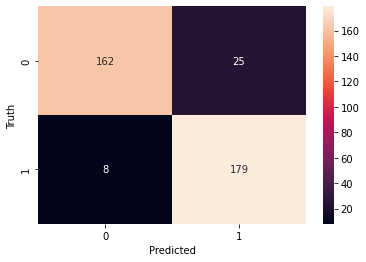

In [41]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.87      0.91       187
           1       0.88      0.96      0.92       187

    accuracy                           0.91       374
   macro avg       0.92      0.91      0.91       374
weighted avg       0.92      0.91      0.91       374



In [49]:
reviews = [
           'Congratulations! Your personal lottery-survey code is 72721. You’re in the first place. Check out your prize http://bla-bla-blas/tI4',
           'Netflix is sending you a refund of $12.99. Please reply with your bank account and routing number to verify and get your refund',
           'Your IRS tax refund is pending acceptance. Please accept within 12 hours—urgent! http://bit.ly/thisisspam.',
           'SomeBank: Your account is temporarily frozen. Please log in to http://thisisafake.adress/spam to secure your account.',
           'Veeresh i am busy actually, can i call you later ',
           'Seeing you happy all the time makes my day. I love you, baby ',
           'Thank you for being so kind Steve'
]

model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.85229015],
       [0.95758355],
       [0.78191394],
       [0.9616361 ],
       [0.36418018],
       [0.14695856],
       [0.1276363 ]], dtype=float32)

first 4 values are more than 0.5 that means, first 4 messages are spam 

last 3 values are less than 0.5 that means , last three messages are not spam